In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
merged_data = pd.merge(ride_data_df, city_data_df, on="city", how="left")
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
by_city = merged_data.groupby("city")
avg_fare = by_city["fare"].mean()
total_drivers = by_city["driver_count"].sum()
total_rides = by_city["ride_id"].count()
city_type = city_data_df.set_index('city')['type']
total_drivers.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [6]:
city_info = pd.DataFrame({"Average Fare": avg_fare, "Total rides": total_rides, 
                          "Number of Drivers": total_drivers, "City Type": city_type})
city_info.head()

,Average Fare,City Type,Number of Drivers,Total rides
Amandaburgh,24.641667,Urban,216,18
Barajasview,25.332273,Urban,572,22
Barronchester,36.422500,Suburban,176,16
Bethanyland,32.956111,Suburban,396,18
Bradshawfurt,40.064000,Rural,70,10


In [7]:
city_info_U = city_info.loc[city_info["City Type"] == "Urban"]
city_info_SU = city_info.loc[city_info["City Type"] == "Suburban"]
city_info_R = city_info.loc[city_info["City Type"] == "Rural"]
city_info_R.head()

,Average Fare,City Type,Number of Drivers,Total rides
Bradshawfurt,40.064000,Rural,70,10
Garzaport,24.123333,Rural,21,3
Harringtonfort,33.470000,Rural,24,6
Jessicaport,36.013333,Rural,6,6
Lake Jamie,34.358333,Rural,24,6


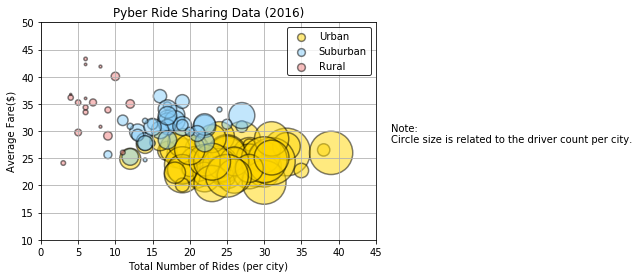

In [29]:
plt.scatter(city_info_U["Total rides"], city_info_U["Average Fare"],
           color = "gold", edgecolors="black", label = "Urban",  s = city_info_U["Number of Drivers"],
            alpha = 0.5, linewidth = 1.5)
plt.scatter(city_info_SU["Total rides"], city_info_SU["Average Fare"],
           color = "lightskyblue", edgecolors="black", s = city_info_SU["Number of Drivers"],
           label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(city_info_R["Total rides"], city_info_R["Average Fare"],
           color = "lightcoral", edgecolors="black", s = city_info_R["Number of Drivers"],
           label = "Rural", alpha = 0.5, linewidth = 1.5)


plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare($)')
plt.text(47,30,"Note:")
plt.text(47,28,"Circle size is related to the driver count per city.")

plt.xlim(0, 45)
plt.ylim(10, 50)

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

plt.grid()

plt.show()

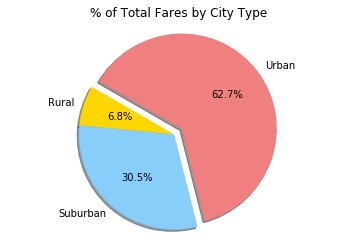

In [51]:
by_city = merged_data.groupby("type")["fare", "type", "ride_id", "date", "driver_count"]
total_fare = by_city.sum()["fare"]

colors = ["gold", "lightskyblue", "lightcoral"]
labels = total_fare.index
explode = [0, 0, .1,]

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

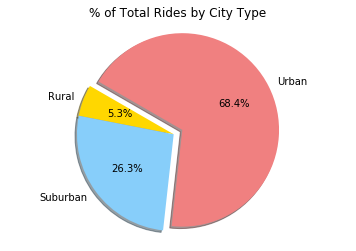

In [53]:
total_rides = by_city.count()["ride_id"]
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

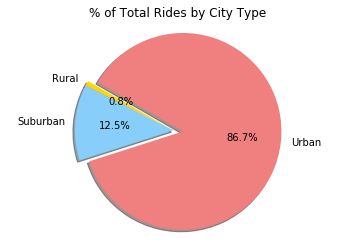

In [57]:
total_drivers = by_city.sum()["driver_count"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()